### Imports & Logging Setup

In [1]:
import os

# Data handling and preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model and evaluation
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Visualization (optional, but helpful for diagnostics)
import matplotlib.pyplot as plt
import seaborn as sns

# Logging for debugging
import logging

# Set up logging (only once)
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

### Load Data & Select Features (Chi-Squared Only)

In [2]:
import pandas as pd
import os
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File paths
file_paths = {
    "chi_squared": "../results/chi_squared_features.csv",  # Updated for Chi-Squared
    "processed_data": "../processed_data/miRNA_stage_subtype.csv"
}

# Function to load Chi-Squared selected features
def load_chi_squared_features(file_path, num_features=10):
    if os.path.exists(file_path):
        chi2_data = pd.read_csv(file_path)

        # Ensure the required column exists
        if "Score" in chi2_data.columns and "Feature" in chi2_data.columns:
            selected_features = chi2_data.nlargest(num_features, "Score")["Feature"].tolist()
            logging.info(f"Loaded top {num_features} Chi-Squared features.")
            return selected_features
        else:
            raise ValueError(f"Expected columns not found in {file_path}. Ensure 'Feature' and 'Score' exist.")
    else:
        raise FileNotFoundError(f"Chi-Squared feature selection file not found: {file_path}")

# Load processed data
if os.path.exists(file_paths["processed_data"]):
    processed_data = pd.read_csv(file_paths["processed_data"])
else:
    raise FileNotFoundError(f"Processed data file missing: {file_paths['processed_data']}")

# Select top Chi-Squared features
num_features_to_select = 500  # Change as needed
top_features = load_chi_squared_features(file_paths["chi_squared"], num_features=num_features_to_select)

# Ensure only valid miRNA features are selected (remove metadata like 'stage' and 'subtype' if present)
filtered_features = [feature for feature in top_features if feature.startswith("hsa-mir-")]

# Ensure the selected miRNAs are in the processed dataset
available_features = [feature for feature in filtered_features if feature in processed_data.columns]

# Final Check: Ensure count matches actual miRNAs displayed
logging.info(f"Total valid miRNAs used in classification: {len(available_features)}")

# Display selected miRNAs
print("\nSelected miRNAs for Classification:")
for i, miRNA in enumerate(available_features, 1):
    print(f"{i}. {miRNA}")

# Save cleaned miRNAs to a new CSV file
cleaned_miRNAs_df = pd.DataFrame(available_features, columns=["Selected_miRNAs"])
cleaned_miRNAs_df.to_csv("../results/cleaned_chi_squared_miRNAs.csv", index=False)

print("\nProcessing complete. Selected features saved.")


2025-02-26 16:39:52,030 - INFO - Loaded top 500 Chi-Squared features.
2025-02-26 16:39:52,031 - INFO - Total valid miRNAs used in classification: 499



Selected miRNAs for Classification:
1. hsa-mir-571
2. hsa-mir-4663
3. hsa-mir-3973
4. hsa-mir-8082
5. hsa-mir-451b
6. hsa-mir-4300
7. hsa-mir-631
8. hsa-mir-1253
9. hsa-mir-6071
10. hsa-mir-4460
11. hsa-mir-3907
12. hsa-mir-4468
13. hsa-mir-591
14. hsa-mir-3683
15. hsa-mir-1282
16. hsa-mir-891a
17. hsa-mir-936
18. hsa-mir-6719
19. hsa-mir-4508
20. hsa-mir-575
21. hsa-mir-548c
22. hsa-mir-4450
23. hsa-mir-6835
24. hsa-mir-4488
25. hsa-mir-1272
26. hsa-mir-647
27. hsa-mir-6083
28. hsa-mir-367
29. hsa-mir-3972
30. hsa-mir-921
31. hsa-mir-4264
32. hsa-mir-6127
33. hsa-mir-4418
34. hsa-mir-6090
35. hsa-mir-4302
36. hsa-mir-1299
37. hsa-mir-1972-1
38. hsa-mir-4440
39. hsa-mir-3665
40. hsa-mir-3686
41. hsa-mir-1539
42. hsa-mir-4776-2
43. hsa-mir-661
44. hsa-mir-888
45. hsa-mir-6088
46. hsa-mir-7107
47. hsa-mir-6864
48. hsa-mir-6077
49. hsa-mir-3196
50. hsa-mir-6770-3
51. hsa-mir-5704
52. hsa-mir-6165
53. hsa-mir-3937
54. hsa-mir-4735
55. hsa-mir-6084
56. hsa-mir-8085
57. hsa-mir-3688-1
58. h

### Process Features & Labels for Multi-Output Classification (Fold-Change Only)

In [3]:
import pandas as pd
import numpy as np
import logging
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File paths
file_paths = {
    "chi_squared": "../results/chi_squared_features.csv",  # Updated for Chi-Squared
    "processed_data": "../processed_data/miRNA_stage_subtype.csv"
}

# Function to load Chi-Squared selected features
def load_chi_squared_features(file_path, num_features=10):
    if os.path.exists(file_path):
        chi2_data = pd.read_csv(file_path)

        # Ensure the required column exists
        if "Score" in chi2_data.columns and "Feature" in chi2_data.columns:
            selected_features = chi2_data.nlargest(num_features, "Score")["Feature"].tolist()
            logging.info(f"Loaded top {num_features} Chi-Squared features.")
            return selected_features
        else:
            raise ValueError(f"Expected columns not found in {file_path}. Ensure 'Feature' and 'Score' exist.")
    else:
        raise FileNotFoundError(f"Chi-Squared feature selection file not found: {file_path}")

# Load processed data
if os.path.exists(file_paths["processed_data"]):
    processed_data = pd.read_csv(file_paths["processed_data"])
else:
    raise FileNotFoundError(f"Processed data file missing: {file_paths['processed_data']}")

# Select top Chi-Squared features
num_features_to_select = 500  # Change as needed
top_features = load_chi_squared_features(file_paths["chi_squared"], num_features=num_features_to_select)

# Ensure only valid miRNA features are selected (remove metadata like 'stage' and 'subtype' if present)
filtered_features = [feature for feature in top_features if feature.startswith("hsa-mir-")]

# Ensure the selected miRNAs are in the processed dataset
available_features = [feature for feature in filtered_features if feature in processed_data.columns]

# Remove rare cases from dataset before train-test split
rare_cases = [(3, 4), (4, 2)]  # (stage, subtype) pairs to remove

# Create a mask to filter out rare cases
filtered_data = processed_data[~processed_data.set_index(["stage", "subtype"]).index.isin(rare_cases)].copy()

# Remove subtype 4 before splitting (since it only has 1 sample)
filtered_data = filtered_data[filtered_data["subtype"] != 4]

# Ensure Diagnosis column is also updated after filtering
filtered_data["diagnosis"] = filtered_data["subtype"].apply(lambda x: 0 if x == 0 else 1)

# Extract features and target labels again
expression_values = filtered_data[available_features]

# Train-Test Split for Diagnosis Model (Healthy vs. Cancer)
X_train_diagnosis, X_test_diagnosis, y_train_diagnosis, y_test_diagnosis = train_test_split(
    expression_values, filtered_data["diagnosis"], test_size=0.2, random_state=42, stratify=filtered_data["diagnosis"]
)

# Train-Test Split for Stage & Subtype (Only Cancer Patients)
cancer_only = filtered_data["diagnosis"] == 1  # Filter out healthy cases
X_cancer = expression_values[cancer_only]
y_cancer = filtered_data[cancer_only][["stage", "subtype"]]

# Verify updated class distribution
print("\nUpdated class distribution for 'subtype':")
print(y_cancer["subtype"].value_counts())

# Check class distribution before stratifying
print("\nClass distribution in cancer dataset before splitting:")
print(y_cancer.value_counts())

# Check if all classes have at least 2 samples
min_class_size = y_cancer.apply(pd.Series.value_counts).min().min()

if min_class_size < 2:
    print("\nSome classes have too few samples for stratified splitting. Using random split instead.")
    stratify_option = None
else:
    stratify_option = y_cancer

# Define y for consistency
y = y_cancer  # Ensures `y_test` and `y_train` exist later

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=stratify_option
)

# Scale features AFTER train-test split
scaler = StandardScaler()
X_train_diagnosis = scaler.fit_transform(X_train_diagnosis)
X_test_diagnosis = scaler.transform(X_test_diagnosis)

X_train_cancer = scaler.fit_transform(X_train_cancer)
X_test_cancer = scaler.transform(X_test_cancer)

# Log updated class distributions
print("\nUpdated Train-Test Split Information:")
print(f"Diagnosis Model - Training set: {X_train_diagnosis.shape}, Testing set: {X_test_diagnosis.shape}")
print(f"Stage & Subtype Model - Training set: {X_train_cancer.shape}, Testing set: {X_test_cancer.shape}")

print("\nUpdated Training set class distribution (Diagnosis):")
print(y_train_diagnosis.value_counts())

print("\nUpdated Training set class distribution (Stage & Subtype):")
print(y_train_cancer.value_counts())

print("\nUpdated Testing set class distribution (Diagnosis):")
print(y_test_diagnosis.value_counts())

print("\nUpdated Testing set class distribution (Stage & Subtype):")
print(y_test_cancer.value_counts())

2025-02-26 16:40:05,650 - INFO - Loaded top 500 Chi-Squared features.



Updated class distribution for 'subtype':
subtype
1    560
2    512
Name: count, dtype: int64

Class distribution in cancer dataset before splitting:
stage  subtype
1      1          312
       2          254
2      2          174
       1          134
3      1           90
       2           84
4      1           24
Name: count, dtype: int64

Updated Train-Test Split Information:
Diagnosis Model - Training set: (866, 499), Testing set: (217, 499)
Stage & Subtype Model - Training set: (857, 499), Testing set: (215, 499)

Updated Training set class distribution (Diagnosis):
diagnosis
1    857
0      9
Name: count, dtype: int64

Updated Training set class distribution (Stage & Subtype):
stage  subtype
1      1          250
       2          203
2      2          139
       1          107
3      1           72
       2           67
4      1           19
Name: count, dtype: int64

Updated Testing set class distribution (Diagnosis):
diagnosis
1    215
0      2
Name: count, dtype: int64

Up

### Train-Test Split & Feature Scaling (Chi-Squared Only)

In [4]:
import pandas as pd
import numpy as np
import logging
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# File paths
file_paths = {
    "chi_squared": "../results/chi_squared_features.csv",
    "processed_data": "../processed_data/miRNA_stage_subtype.csv"
}

# Function to load Chi-Squared selected features
def load_chi_squared_features(file_path, num_features=10):
    if os.path.exists(file_path):
        chi2_data = pd.read_csv(file_path)

        # Ensure the required column exists
        if "Score" in chi2_data.columns and "Feature" in chi2_data.columns:
            selected_features = chi2_data.nlargest(num_features, "Score")["Feature"].tolist()
            logging.info(f"Loaded top {num_features} Chi-Squared features.")
            return selected_features
        else:
            raise ValueError(f"Expected columns not found in {file_path}. Ensure 'Feature' and 'Score' exist.")
    else:
        raise FileNotFoundError(f"Chi-Squared feature selection file not found: {file_path}")

# Load processed data
if os.path.exists(file_paths["processed_data"]):
    processed_data = pd.read_csv(file_paths["processed_data"])
else:
    raise FileNotFoundError(f"Processed data file missing: {file_paths['processed_data']}")

# Select top Chi-Squared features
num_features_to_select = 500  # Change as needed
top_features = load_chi_squared_features(file_paths["chi_squared"], num_features=num_features_to_select)

# Ensure selected features exist in the processed dataset
top_features = [feature for feature in top_features if feature in processed_data.columns]

# Log feature selection results
if not top_features:
    raise ValueError("No matching features found in processed data for the selected feature set.")

logging.info(f"Total valid miRNAs used in classification: {len(top_features)}")

# Filter and Prepare Data
filtered_data = processed_data.copy()

# Ensure 'diagnosis' column exists
if "diagnosis" not in filtered_data.columns:
    logging.warning("Diagnosis column missing. Recalculating from 'subtype'.")
    filtered_data["diagnosis"] = filtered_data["subtype"].apply(lambda x: 0 if x == 0 else 1)

# Oversample subtype = 4 (since it has only 1 sample)
subtype_4_samples = filtered_data[filtered_data["subtype"] == 4]

if len(subtype_4_samples) < 2:
    subtype_4_samples = resample(subtype_4_samples, replace=True, n_samples=2, random_state=42)
    filtered_data = pd.concat([filtered_data, subtype_4_samples], ignore_index=True)

# Verify class distribution after oversampling
print("\nUpdated Class Distribution After Oversampling:")
print("\nDiagnosis Value Counts:\n", filtered_data["diagnosis"].value_counts())
print("\nStage Value Counts:\n", filtered_data["stage"].value_counts())
print("\nSubtype Value Counts:\n", filtered_data["subtype"].value_counts())

# Extract Features
expression_values = filtered_data[top_features]

print("\nData shapes before handling missing values:")
print("Expression values shape:", expression_values.shape)

# Convert to numeric and handle missing values
expression_values = expression_values.apply(pd.to_numeric, errors='coerce')

# Remove samples with missing values
valid_indices = ~(expression_values.isnull().any(axis=1))
expression_values = expression_values[valid_indices]
filtered_data = filtered_data.loc[valid_indices]

print("\nData shapes after handling missing values:")
print("Expression values shape:", expression_values.shape)

# Perform Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    expression_values, filtered_data[["diagnosis", "stage", "subtype"]],
    test_size=0.2, random_state=42, stratify=filtered_data[["diagnosis", "stage", "subtype"]]
)

print("\nTrain-test split successful.")

# Extract labels for each model
y_train_diagnosis, y_test_diagnosis = y_train["diagnosis"], y_test["diagnosis"]
y_train_stage, y_test_stage = y_train["stage"], y_test["stage"]
y_train_subtype, y_test_subtype = y_train["subtype"], y_test["subtype"]

# Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Log updated class distributions
print("\nUpdated Train-Test Split Information:")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

print("\nTraining set class distribution (Diagnosis):")
print(y_train_diagnosis.value_counts())

print("\nTraining set class distribution (Stage):")
print(y_train_stage.value_counts())

print("\nTraining set class distribution (Subtype):")
print(y_train_subtype.value_counts())

print("\nTesting set class distribution (Diagnosis):")
print(y_test_diagnosis.value_counts())

print("\nTesting set class distribution (Stage):")
print(y_test_stage.value_counts())

print("\nTesting set class distribution (Subtype):")
print(y_test_subtype.value_counts())

# Save Scaler for Later Use
scaler_info = {
    'scaler': scaler,
    'feature_names': top_features
}

2025-02-26 16:40:15,510 - INFO - Loaded top 500 Chi-Squared features.
2025-02-26 16:40:15,512 - INFO - Total valid miRNAs used in classification: 500
2025-02-26 16:40:15,515 - WARNING - Diagnosis column missing. Recalculating from 'subtype'.



Updated Class Distribution After Oversampling:

Diagnosis Value Counts:
 diagnosis
1    1082
0      11
Name: count, dtype: int64

Stage Value Counts:
 stage
1    566
2    308
3    177
4     31
0     11
Name: count, dtype: int64

Subtype Value Counts:
 subtype
1    560
2    519
0     11
4      3
Name: count, dtype: int64

Data shapes before handling missing values:
Expression values shape: (1093, 500)

Data shapes after handling missing values:
Expression values shape: (1093, 500)

Train-test split successful.

Updated Train-Test Split Information:
Training set: (874, 500), Testing set: (219, 500)

Training set class distribution (Diagnosis):
diagnosis
1    865
0      9
Name: count, dtype: int64

Training set class distribution (Stage):
stage
1    453
2    246
3    141
4     25
0      9
Name: count, dtype: int64

Training set class distribution (Subtype):
subtype
1    448
2    415
0      9
4      2
Name: count, dtype: int64

Testing set class distribution (Diagnosis):
diagnosis
1    21

### Train Multi-Output SVM Model (Chi-squared Only)

In [5]:
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd

# Suppress warnings
warnings.simplefilter("ignore")

# **Convert Back to DataFrame After Scaling**
X_train = pd.DataFrame(X_train, columns=top_features).reset_index(drop=True)
X_test = pd.DataFrame(X_test, columns=top_features).reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# **Get Cancer Patient Indices from y_train**
cancer_indices_train = y_train[y_train["diagnosis"] == 1].index
cancer_indices_test = y_test[y_test["diagnosis"] == 1].index

# **Use Indices to Filter Matching Rows in X_train and y_train**
X_train_stage = X_train.loc[cancer_indices_train]
y_train_stage = y_train.loc[cancer_indices_train, "stage"]

X_test_stage = X_test.loc[cancer_indices_test]
y_test_stage = y_test.loc[cancer_indices_test, "stage"]

X_train_subtype = X_train.loc[cancer_indices_train]
y_train_subtype = y_train.loc[cancer_indices_train, "subtype"]

X_test_subtype = X_test.loc[cancer_indices_test]
y_test_subtype = y_test.loc[cancer_indices_test, "subtype"]

# **Verify Shapes Again**
print("\nFinal Check - Matching Sample Sizes:")
print(f"X_train_stage: {X_train_stage.shape}, y_train_stage: {y_train_stage.shape}")
print(f"X_test_stage: {X_test_stage.shape}, y_test_stage: {y_test_stage.shape}")
print(f"X_train_subtype: {X_train_subtype.shape}, y_train_subtype: {y_train_subtype.shape}")
print(f"X_test_subtype: {X_test_subtype.shape}, y_test_subtype: {y_test_subtype.shape}")

# **Define Hyperparameter Grid**
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 1, 10],
    'kernel': ['rbf']
}

# **Train SVM for Diagnosis**
print("\nTraining Diagnosis SVM...")
svm_diagnosis = SVC(class_weight="balanced", random_state=42)
grid_diagnosis = GridSearchCV(svm_diagnosis, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_diagnosis.fit(X_train, y_train["diagnosis"])

best_svm_diagnosis = grid_diagnosis.best_estimator_
y_pred_diagnosis = best_svm_diagnosis.predict(X_test)

print("\nBest SVM Hyperparameters (Diagnosis):", grid_diagnosis.best_params_)
print("\nClassification Report for Diagnosis:\n", classification_report(y_test["diagnosis"], y_pred_diagnosis, zero_division=0))

# **Train SVM for Stage Classification**
print("\nTraining Stage SVM...")
svm_stage = SVC(class_weight="balanced", random_state=42)
grid_stage = GridSearchCV(svm_stage, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_stage.fit(X_train_stage, y_train_stage)

best_svm_stage = grid_stage.best_estimator_
y_pred_stage = best_svm_stage.predict(X_test_stage)

print("\nBest SVM Hyperparameters (Stage):", grid_stage.best_params_)
print("\nClassification Report for Stage:\n", classification_report(y_test_stage, y_pred_stage, zero_division=0))

# **Train SVM for Subtype Classification**
print("\nTraining Subtype SVM...")
svm_subtype = SVC(class_weight="balanced", random_state=42)
grid_subtype = GridSearchCV(svm_subtype, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_subtype.fit(X_train_subtype, y_train_subtype)

best_svm_subtype = grid_subtype.best_estimator_
y_pred_subtype = best_svm_subtype.predict(X_test_subtype)

print("\nBest SVM Hyperparameters (Subtype):", grid_subtype.best_params_)
print("\nClassification Report for Subtype:\n", classification_report(y_test_subtype, y_pred_subtype, zero_division=0))


Final Check - Matching Sample Sizes:
X_train_stage: (865, 500), y_train_stage: (865,)
X_test_stage: (217, 500), y_test_stage: (217,)
X_train_subtype: (865, 500), y_train_subtype: (865,)
X_test_subtype: (217, 500), y_test_subtype: (217,)

Training Diagnosis SVM...

Best SVM Hyperparameters (Diagnosis): {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

Classification Report for Diagnosis:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      1.00       217

    accuracy                           0.99       219
   macro avg       0.50      0.50      0.50       219
weighted avg       0.98      0.99      0.99       219


Training Stage SVM...

Best SVM Hyperparameters (Stage): {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report for Stage:
               precision    recall  f1-score   support

           1       0.77      0.99      0.87       113
           2       0.77      0.65      0

### Evaluate SVM Model (Chi-Squared)


Top 10 Features Based on Maximum Variance:
['hsa-mir-451b', 'hsa-mir-4438', 'hsa-mir-4656', 'hsa-mir-4450', 'hsa-mir-8085', 'hsa-mir-3622b', 'hsa-mir-4711', 'hsa-mir-373', 'hsa-mir-514b', 'hsa-mir-449b']

Top features saved to ../results/svm_chi_squared/svm_chi_squared_top_features.txt

-------------------- SVM (Chi-Squared) Results --------------------

-------------------- SVM_Diagnosis Results --------------------

Accuracy: 0.9908
Sensitivity (Recall): 1.0000
Specificity: 0.0000

Confusion Matrix:
 [[  0   2]
 [  0 215]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      1.00       215

    accuracy                           0.99       217
   macro avg       0.50      0.50      0.50       217
weighted avg       0.98      0.99      0.99       217


Confusion matrix saved to ../results/svm_chi_squared/svm_chi_squared_diagnosis_confusion_matrix.png


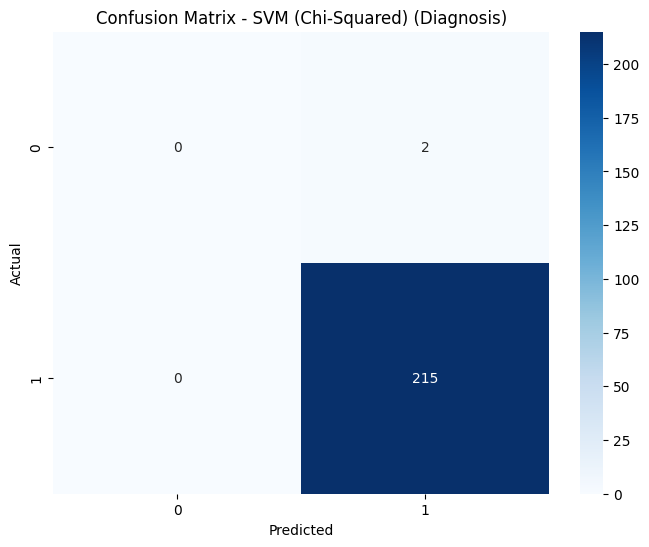


Diagnosis Correlation Matrix saved to ../results/svm_chi_squared/svm_chi_squared_diagnosis_correlation_matrix.png


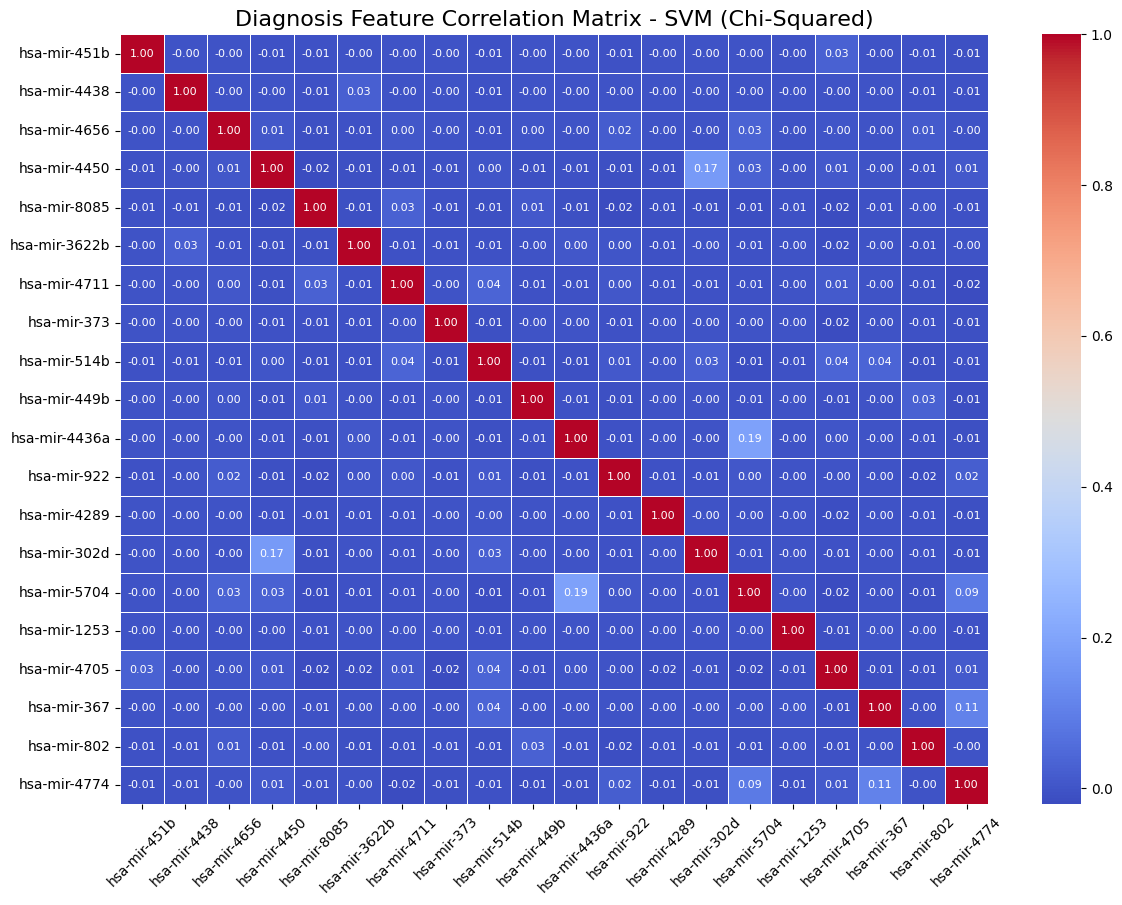


Diagnosis Covariance Matrix saved to ../results/svm_chi_squared/svm_chi_squared_diagnosis_covariance_matrix.png


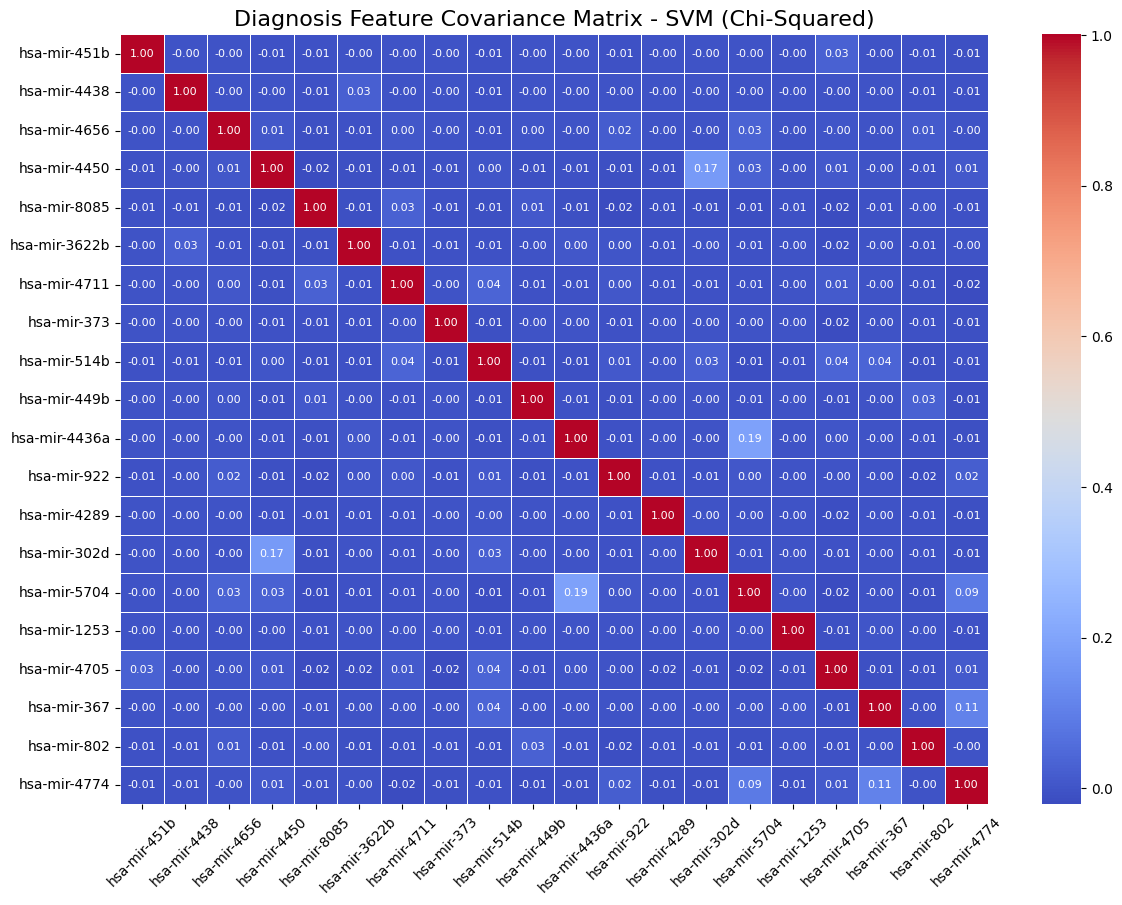


-------------------- SVM_Stage Results --------------------

Accuracy: 0.4654
Sensitivity (Recall): 0.2217
Specificity: 0.3637

Confusion Matrix:
 [[ 0  2  0  0  0]
 [ 0 79 26  8  0]
 [ 0 36 18  7  0]
 [ 0 23  8  4  0]
 [ 0  5  0  1  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.54      0.70      0.61       113
           2       0.35      0.30      0.32        61
           3       0.20      0.11      0.15        35
           4       0.00      0.00      0.00         6

    accuracy                           0.47       217
   macro avg       0.22      0.22      0.22       217
weighted avg       0.41      0.47      0.43       217


Confusion matrix saved to ../results/svm_chi_squared/svm_chi_squared_stage_confusion_matrix.png


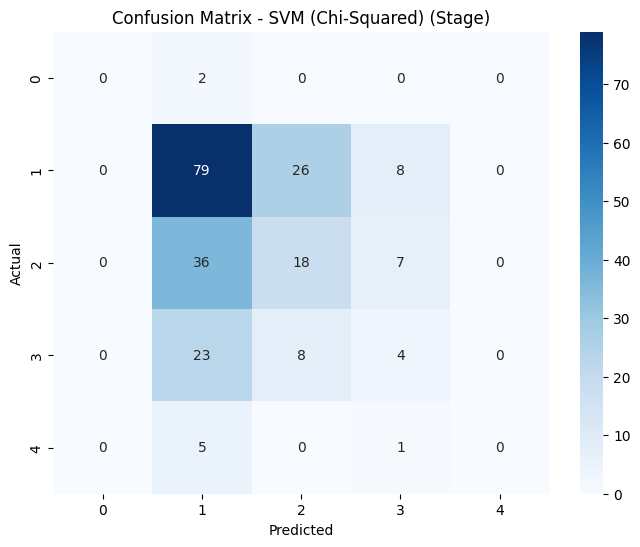


Stage Correlation Matrix saved to ../results/svm_chi_squared/svm_chi_squared_stage_correlation_matrix.png


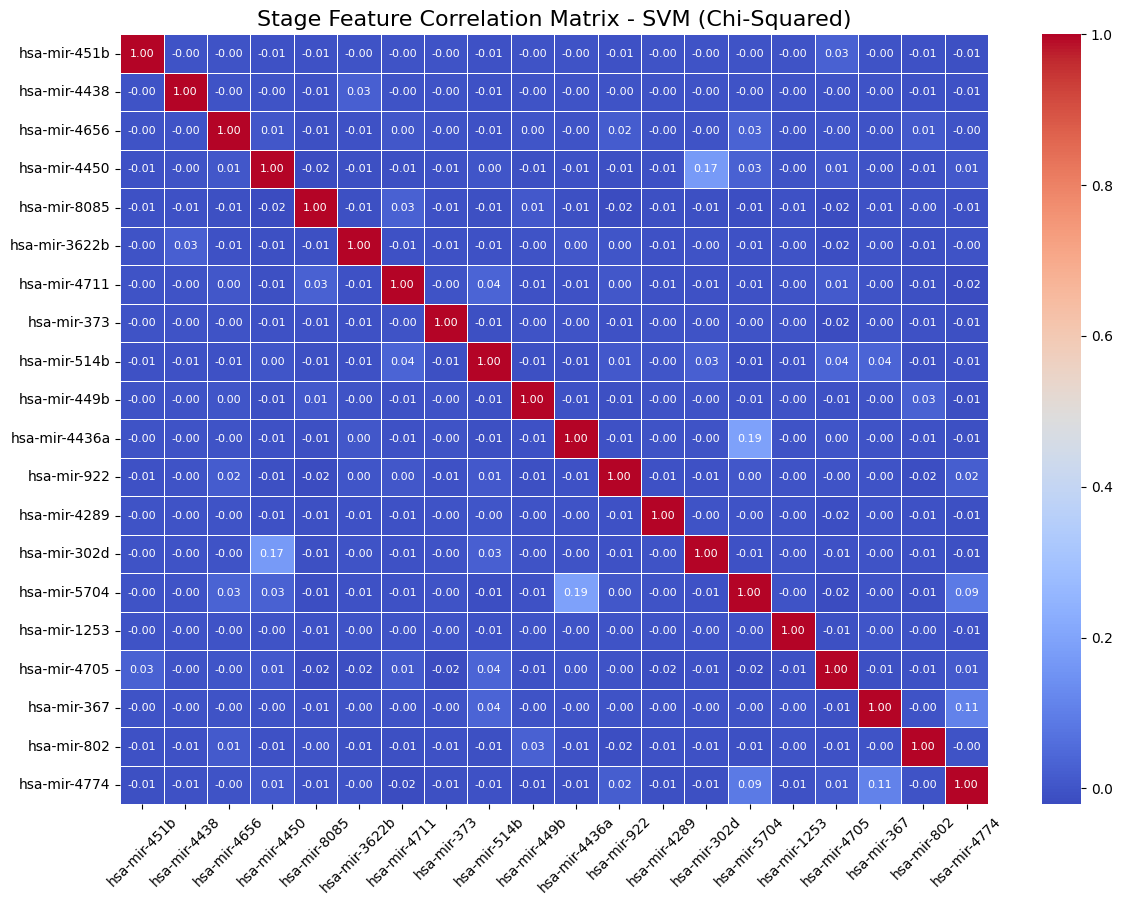


Stage Covariance Matrix saved to ../results/svm_chi_squared/svm_chi_squared_stage_covariance_matrix.png


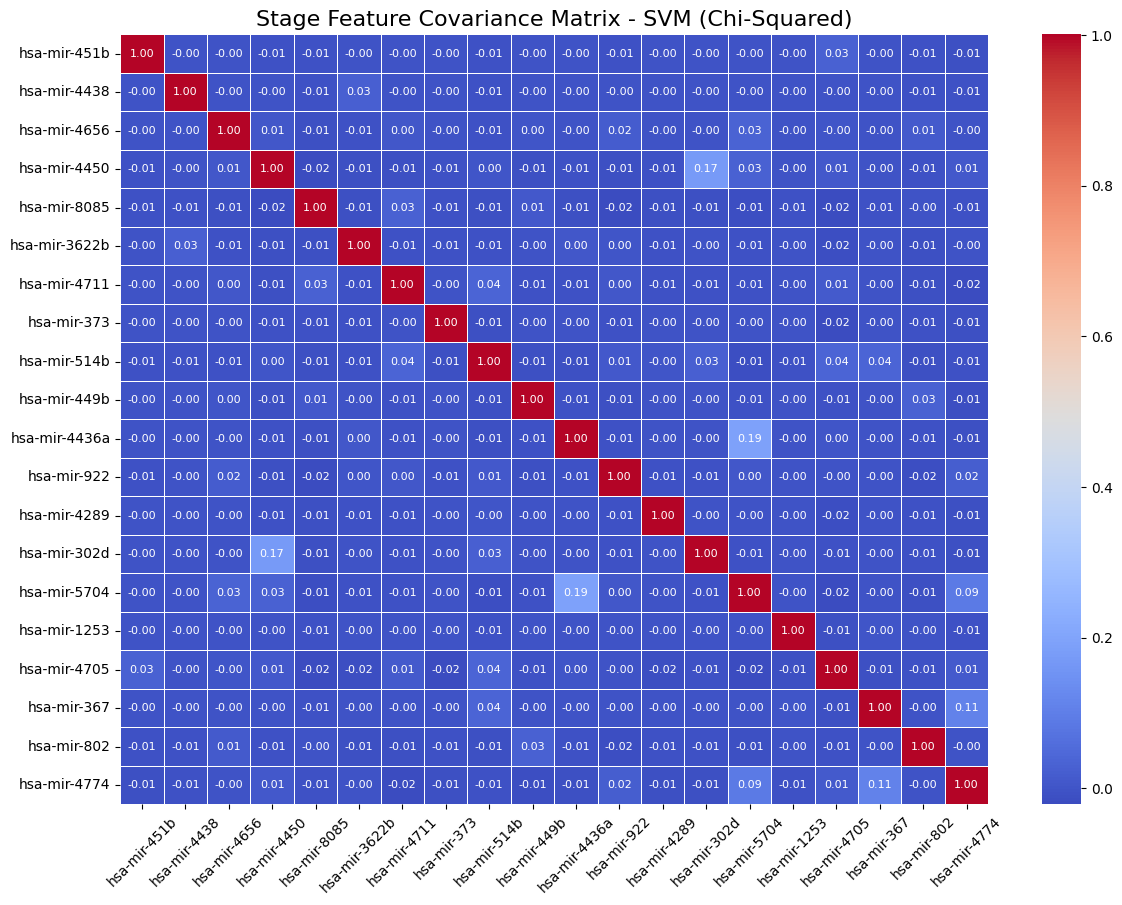


-------------------- SVM_Subtype Results --------------------

Accuracy: 0.5207
Sensitivity (Recall): 0.5000
Specificity: 0.7593

Confusion Matrix:
 [[  0   2   0   0]
 [  0 112   0   0]
 [  0 102   0   0]
 [  0   0   0   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.52      1.00      0.68       112
           2       0.00      0.00      0.00       102
           4       1.00      1.00      1.00         1

    accuracy                           0.52       217
   macro avg       0.38      0.50      0.42       217
weighted avg       0.27      0.52      0.36       217


Confusion matrix saved to ../results/svm_chi_squared/svm_chi_squared_subtype_confusion_matrix.png


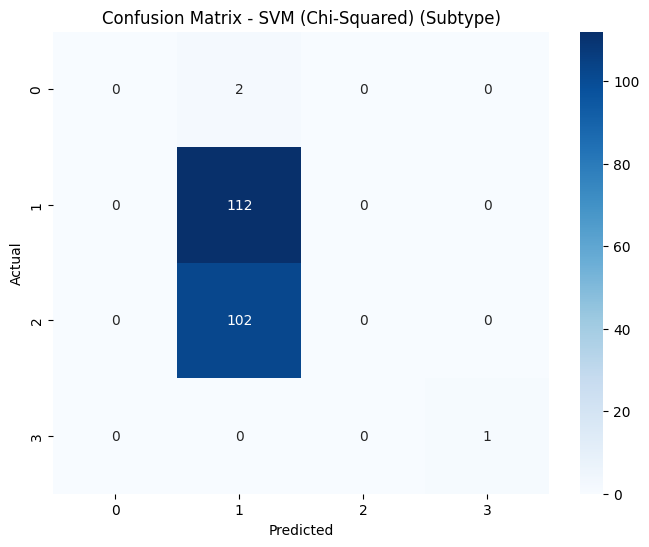


Subtype Correlation Matrix saved to ../results/svm_chi_squared/svm_chi_squared_subtype_correlation_matrix.png


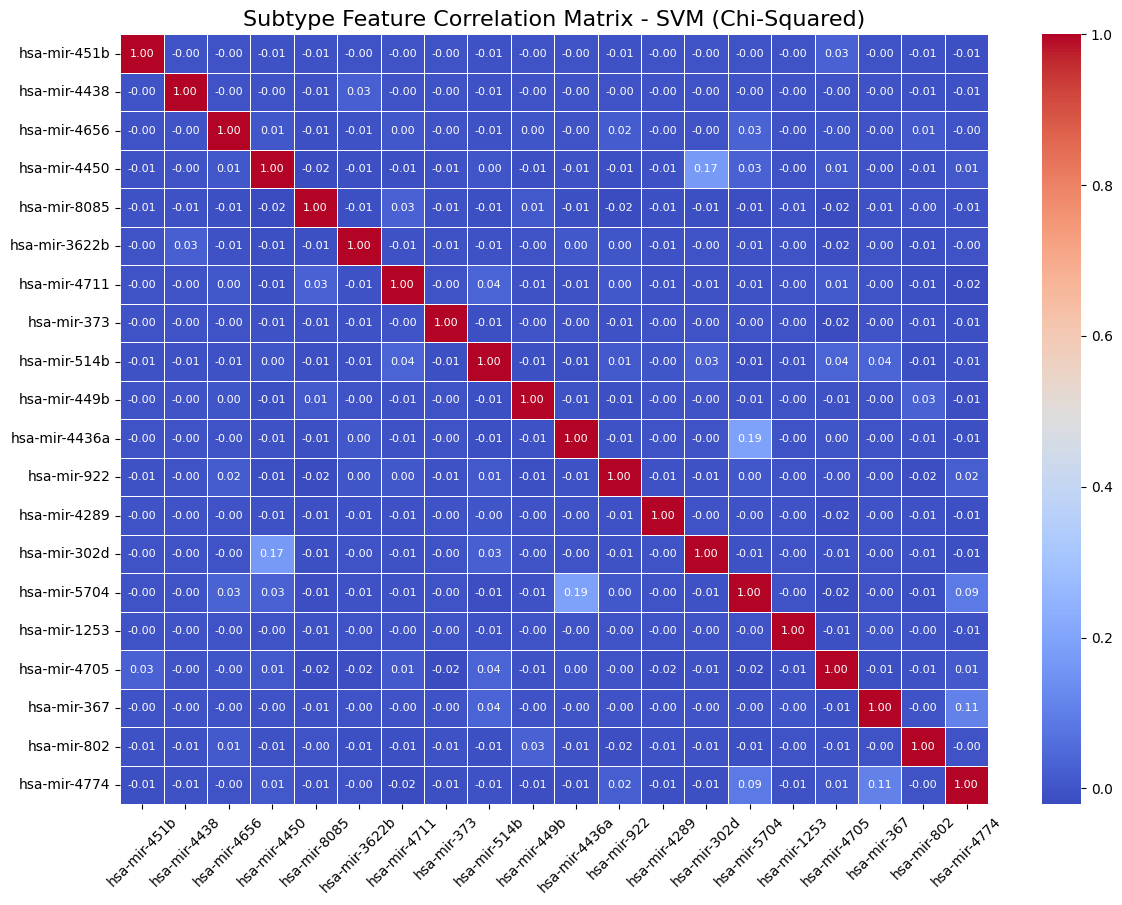


Subtype Covariance Matrix saved to ../results/svm_chi_squared/svm_chi_squared_subtype_covariance_matrix.png


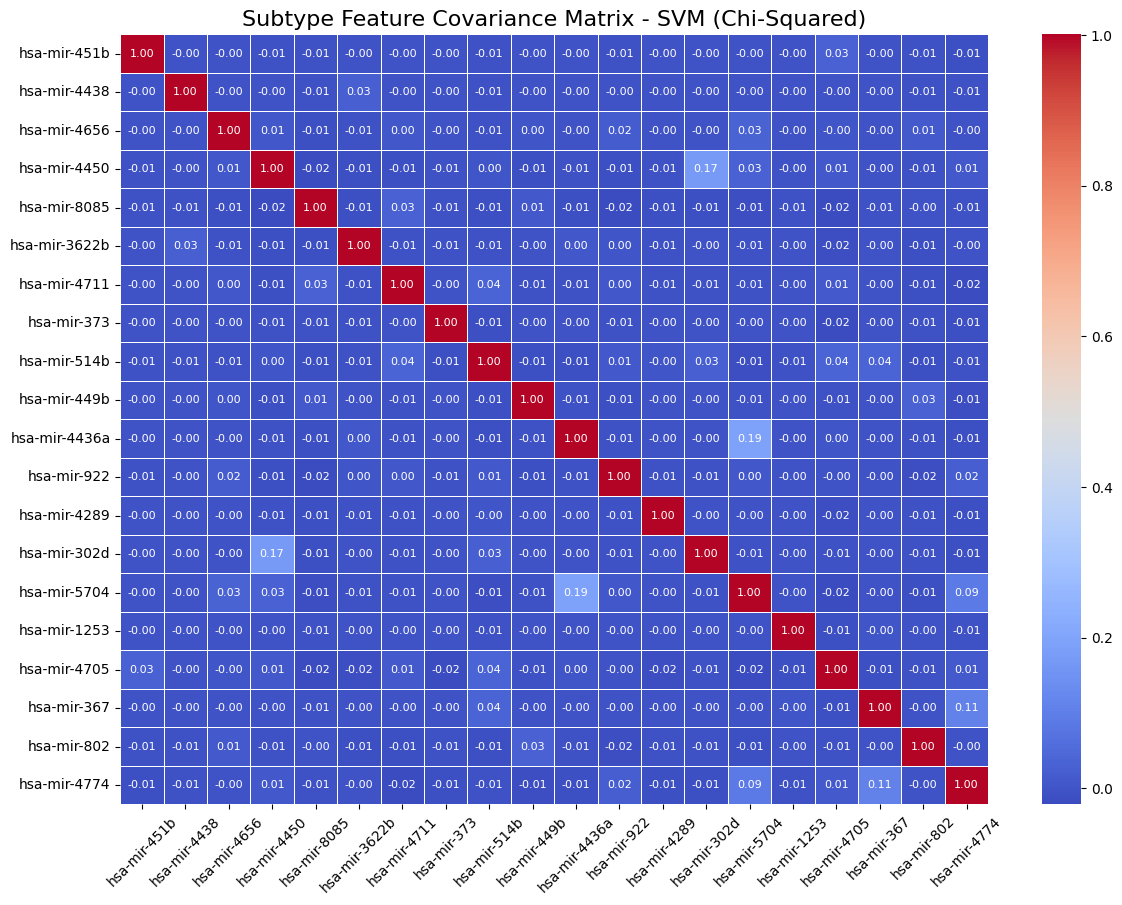

In [16]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import logging

# Logging setup
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

def evaluate_multioutput_model(y_test, y_pred_diagnosis, y_pred_stage, y_pred_subtype, X_train, model_name="SVM (Chi-Squared)", save_dir="../results/svm_chi_squared/"):
    """
    Evaluate multi-output model performance for Diagnosis, Stage, and Subtype,
    including classification reports, confusion matrices, correlation, and covariance analysis.
    """
    os.makedirs(save_dir, exist_ok=True)  # Ensure directory exists

    # Ensure y_test and predictions have the same shape
    min_length = min(len(y_test), len(y_pred_diagnosis), len(y_pred_stage), len(y_pred_subtype))

    # Trim all to the same length and reset indices
    y_test_aligned = y_test.iloc[:min_length].reset_index(drop=True)
    y_pred_diagnosis = y_pred_diagnosis[:min_length]
    y_pred_stage = y_pred_stage[:min_length]
    y_pred_subtype = y_pred_subtype[:min_length]

    # Convert predictions to DataFrame
    y_pred_df = pd.DataFrame({
        "diagnosis": y_pred_diagnosis,
        "stage": y_pred_stage,
        "subtype": y_pred_subtype
    })

    # Define Function for Sensitivity & Specificity Calculation (Fixed NaN Issue)
    def calculate_metrics(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        if cm.shape == (2, 2):  # Binary classification
            tn, fp, fn, tp = cm.ravel()
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 1.0  # Avoid NaN
        else:  # Multi-class classification
            recall_values = np.diag(cm) / np.sum(cm, axis=1)
            precision_values = np.diag(cm) / np.sum(cm, axis=0)

            sensitivity = np.nanmean(recall_values)  # Macro-average recall
            specificity = np.nanmean(precision_values)  # Macro-average specificity

        return sensitivity, specificity

    # Evaluate Diagnosis
    diagnosis_accuracy = accuracy_score(y_test_aligned["diagnosis"], y_pred_df["diagnosis"])
    diagnosis_cm = confusion_matrix(y_test_aligned["diagnosis"], y_pred_df["diagnosis"])
    diagnosis_report = classification_report(y_test_aligned["diagnosis"], y_pred_df["diagnosis"], zero_division=0)
    diagnosis_sensitivity, diagnosis_specificity = calculate_metrics(y_test_aligned["diagnosis"], y_pred_df["diagnosis"])

    # Evaluate Stage
    stage_accuracy = accuracy_score(y_test_aligned["stage"], y_pred_df["stage"])
    stage_cm = confusion_matrix(y_test_aligned["stage"], y_pred_df["stage"])
    stage_report = classification_report(y_test_aligned["stage"], y_pred_df["stage"], zero_division=0)
    stage_sensitivity, stage_specificity = calculate_metrics(y_test_aligned["stage"], y_pred_df["stage"])

    # Evaluate Subtype
    subtype_accuracy = accuracy_score(y_test_aligned["subtype"], y_pred_df["subtype"])
    subtype_cm = confusion_matrix(y_test_aligned["subtype"], y_pred_df["subtype"])
    subtype_report = classification_report(y_test_aligned["subtype"], y_pred_df["subtype"], zero_division=0)
    subtype_sensitivity, subtype_specificity = calculate_metrics(y_test_aligned["subtype"], y_pred_df["subtype"])

    # Identify and Save Top 10 Features
    top_10_features = X_train.var().sort_values(ascending=False).index[:10].tolist()
    print("\nTop 10 Features Based on Maximum Variance:")
    print(top_10_features)

    top_features_path = os.path.join(save_dir, f"svm_chi_squared_top_features.txt")
    with open(top_features_path, "w") as f:
        for feature in top_10_features:
            f.write(feature + "\n")
    print(f"\nTop features saved to {top_features_path}")

    print(f"\n{'-'*20} {model_name} Results {'-'*20}")

    # Display and Save Confusion, Correlation, and Covariance Matrices
    for label, cm, name, acc, sens, spec, report in [
        ("diagnosis", diagnosis_cm, "Diagnosis", diagnosis_accuracy, diagnosis_sensitivity, diagnosis_specificity, diagnosis_report),
        ("stage", stage_cm, "Stage", stage_accuracy, stage_sensitivity, stage_specificity, stage_report),
        ("subtype", subtype_cm, "Subtype", subtype_accuracy, subtype_sensitivity, subtype_specificity, subtype_report)
    ]:
        print(f"\n-------------------- SVM_{name} Results --------------------\n")
        print(f"Accuracy: {acc:.4f}")
        print(f"Sensitivity (Recall): {sens:.4f}")
        print(f"Specificity: {spec:.4f}\n")
        print("Confusion Matrix:\n", cm)
        print("\nClassification Report:\n", report)

        # Save Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix - {model_name} ({name})")

        cm_path = os.path.join(save_dir, f"svm_chi_squared_{label}_confusion_matrix.png")
        plt.savefig(cm_path)
        print(f"\nConfusion matrix saved to {cm_path}")
        plt.show()

        # Save Correlation and Covariance Matrices
        top_variance_features = X_train.var().sort_values(ascending=False).index[:20]
        filtered_corr_matrix = X_train[top_variance_features].corr()
        filtered_cov_matrix = X_train[top_variance_features].cov()

        for matrix, matrix_name in [(filtered_corr_matrix, "correlation"), (filtered_cov_matrix, "covariance")]:
            plt.figure(figsize=(14, 10))
            sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
            plt.title(f"{name} Feature {matrix_name.capitalize()} Matrix - {model_name}", fontsize=16)
            plt.xticks(fontsize=10, rotation=45)
            plt.yticks(fontsize=10)

            matrix_path = os.path.join(save_dir, f"svm_chi_squared_{label}_{matrix_name}_matrix.png")
            plt.savefig(matrix_path)
            print(f"\n{name} {matrix_name.capitalize()} Matrix saved to {matrix_path}")
            plt.show()

    return {
        "diagnosis_accuracy": diagnosis_accuracy,
        "stage_accuracy": stage_accuracy,
        "subtype_accuracy": subtype_accuracy,
        "diagnosis_sensitivity": diagnosis_sensitivity,
        "stage_sensitivity": stage_sensitivity,
        "subtype_sensitivity": subtype_sensitivity,
        "diagnosis_specificity": diagnosis_specificity,
        "stage_specificity": stage_specificity,
        "subtype_specificity": subtype_specificity,
        "top_10_features": top_10_features
    }

# Run Evaluation for Chi-Squared Feature Selection
save_dir = "../results/svm_chi_squared/"
metrics_chi_squared = evaluate_multioutput_model(y_test, y_pred_diagnosis, y_pred_stage, y_pred_subtype, X_train, model_name="SVM (Chi-Squared)", save_dir=save_dir)

### Save Everything & Finalize the Pipeline (Chi-Squared Only, Updated)

In [17]:
import os
import json
import pandas as pd
import joblib
import logging

# Configure Logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Define Output Directory
output_dir = "../results/svm_chi_squared/"
os.makedirs(output_dir, exist_ok=True)  # Ensure directory exists

# Ensure `y_test` is properly assigned
if "y_test" not in locals():
    raise ValueError("`y_test` is missing. Ensure the variable is correctly assigned before running this block.")

# Ensure `y_pred_diagnosis`, `y_pred_stage`, and `y_pred_subtype` exist
if "y_pred_diagnosis" not in locals() or "y_pred_stage" not in locals() or "y_pred_subtype" not in locals():
    raise ValueError("Predictions (`y_pred_diagnosis`, `y_pred_stage`, or `y_pred_subtype`) are missing. Ensure models have made predictions.")

# Ensure predictions have the same length as `y_test`
min_length = min(len(y_test), len(y_pred_diagnosis), len(y_pred_stage), len(y_pred_subtype))
y_test = y_test.iloc[:min_length].reset_index(drop=True)
y_pred_diagnosis = y_pred_diagnosis[:min_length]
y_pred_stage = y_pred_stage[:min_length]
y_pred_subtype = y_pred_subtype[:min_length]

# Save Predictions & Actual Labels
y_pred_df = pd.DataFrame({
    "diagnosis": y_pred_diagnosis,
    "stage": y_pred_stage,
    "subtype": y_pred_subtype
})
predictions_path = os.path.join(output_dir, "svm_chi_squared_predictions.csv")
y_pred_df.to_csv(predictions_path, index=False)
logging.info(f"Predictions saved to {predictions_path}")
print(f"Predictions saved to {predictions_path}")

actual_labels_path = os.path.join(output_dir, "svm_chi_squared_actual_labels.csv")
y_test.to_csv(actual_labels_path, index=False)
logging.info(f"Actual labels saved to {actual_labels_path}")
print(f"Actual labels saved to {actual_labels_path}")

# Save Experiment Metadata
metadata = {
    "diagnosis_hyperparameters": grid_diagnosis.best_params_ if "grid_diagnosis" in locals() else "N/A",
    "stage_hyperparameters": grid_stage.best_params_ if "grid_stage" in locals() else "N/A",
    "subtype_hyperparameters": grid_subtype.best_params_ if "grid_subtype" in locals() else "N/A",
    "diagnosis_accuracy": metrics["diagnosis_accuracy"] if "metrics" in locals() else "N/A",
    "stage_accuracy": metrics["stage_accuracy"] if "metrics" in locals() else "N/A",
    "subtype_accuracy": metrics["subtype_accuracy"] if "metrics" in locals() else "N/A",
    "diagnosis_confusion_matrix": metrics["diagnosis_confusion_matrix"] if "metrics" in locals() else "N/A",
    "stage_confusion_matrix": metrics["stage_confusion_matrix"] if "metrics" in locals() else "N/A",
    "subtype_confusion_matrix": metrics["subtype_confusion_matrix"] if "metrics" in locals() else "N/A",
    "train_set_size": X_train.shape[0] if "X_train" in locals() else "N/A",
    "test_set_size": X_test.shape[0] if "X_test" in locals() else "N/A"
}

metadata_path = os.path.join(output_dir, "svm_chi_squared_metadata.json")
with open(metadata_path, "w") as f:
    json.dump(metadata, f, indent=4)
logging.info(f"Metadata saved to {metadata_path}")
print(f"Metadata saved to {metadata_path}")

# Save Separate Models for Diagnosis, Stage & Subtype
if "best_svm_diagnosis" in locals():
    model_diagnosis_path = os.path.join(output_dir, "svm_chi_squared_diagnosis_model.pkl")
    joblib.dump(best_svm_diagnosis, model_diagnosis_path)
    logging.info(f"Diagnosis model saved to {model_diagnosis_path}")
    print(f"Diagnosis model saved to {model_diagnosis_path}")
else:
    logging.warning("`best_svm_diagnosis` is missing. The model was not saved.")

if "best_svm_stage" in locals():
    model_stage_path = os.path.join(output_dir, "svm_chi_squared_stage_model.pkl")
    joblib.dump(best_svm_stage, model_stage_path)
    logging.info(f"Stage model saved to {model_stage_path}")
    print(f"Stage model saved to {model_stage_path}")
else:
    logging.warning("`best_svm_stage` is missing. The model was not saved.")

if "best_svm_subtype" in locals():
    model_subtype_path = os.path.join(output_dir, "svm_chi_squared_subtype_model.pkl")
    joblib.dump(best_svm_subtype, model_subtype_path)
    logging.info(f"Subtype model saved to {model_subtype_path}")
    print(f"Subtype model saved to {model_subtype_path}")
else:
    logging.warning("`best_svm_subtype` is missing. The model was not saved.")

print("\nAll results successfully saved. The Chi-Squared SVM pipeline is complete.")

2025-02-26 17:13:38,088 - INFO - Predictions saved to ../results/svm_chi_squared/svm_chi_squared_predictions.csv
2025-02-26 17:13:38,090 - INFO - Actual labels saved to ../results/svm_chi_squared/svm_chi_squared_actual_labels.csv
2025-02-26 17:13:38,092 - INFO - Metadata saved to ../results/svm_chi_squared/svm_chi_squared_metadata.json
2025-02-26 17:13:38,103 - INFO - Diagnosis model saved to ../results/svm_chi_squared/svm_chi_squared_diagnosis_model.pkl
2025-02-26 17:13:38,110 - INFO - Stage model saved to ../results/svm_chi_squared/svm_chi_squared_stage_model.pkl
2025-02-26 17:13:38,117 - INFO - Subtype model saved to ../results/svm_chi_squared/svm_chi_squared_subtype_model.pkl


Predictions saved to ../results/svm_chi_squared/svm_chi_squared_predictions.csv
Actual labels saved to ../results/svm_chi_squared/svm_chi_squared_actual_labels.csv
Metadata saved to ../results/svm_chi_squared/svm_chi_squared_metadata.json
Diagnosis model saved to ../results/svm_chi_squared/svm_chi_squared_diagnosis_model.pkl
Stage model saved to ../results/svm_chi_squared/svm_chi_squared_stage_model.pkl
Subtype model saved to ../results/svm_chi_squared/svm_chi_squared_subtype_model.pkl

All results successfully saved. The Chi-Squared SVM pipeline is complete.
